In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

print("Setup is working")


Setup is working


In [3]:
import pandas as pd

df = pd.read_csv("Electric_Vehicle_Population_Data.csv")


In [6]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [7]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE8L,Thurston,Tumwater,WA,98501.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,35.0,124633715,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
1,5YJXCAE2XJ,Snohomish,Bothell,WA,98021.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,1.0,474826075,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJ3E1EBXK,King,Kent,WA,98031.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,47.0,280307233,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7SAYGDEE4T,King,Issaquah,WA,98027.0,2026,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,41.0,280786565,POINT (-122.03439 47.5301),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WAUUPBFF9G,King,Seattle,WA,98103.0,2016,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16.0,43.0,198988891,POINT (-122.35436 47.67596),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10


In [8]:
df['Make'].value_counts().head(5)


Make
TESLA        111049
CHEVROLET     19032
NISSAN        15963
FORD          14819
KIA           13470
Name: count, dtype: int64

In [9]:
df['Model'].value_counts().head(5)



Model
MODEL Y    57335
MODEL 3    37413
LEAF       13503
MODEL S     7758
BOLT EV     7708
Name: count, dtype: int64

In [10]:
df['Electric Vehicle Type'].value_counts()


Electric Vehicle Type
Battery Electric Vehicle (BEV)            215859
Plug-in Hybrid Electric Vehicle (PHEV)     54403
Name: count, dtype: int64

In [11]:
df['County'].value_counts().head(10)


County
King         133903
Snohomish     33531
Pierce        22213
Clark         16553
Thurston       9852
Kitsap         9057
Spokane        7593
Whatcom        6620
Benton         3792
Skagit         3166
Name: count, dtype: int64

In [12]:
df['Model Year'].value_counts().sort_index()


Model Year
1999        2
2000        8
2002        1
2003        1
2008       20
2010       23
2011      603
2012     1402
2013     3989
2014     3223
2015     4430
2016     5139
2017     8459
2018    14007
2019    10811
2020    12099
2021    20628
2022    29622
2023    59324
2024    49138
2025    35954
2026    11379
Name: count, dtype: int64

In [13]:
df.loc[df['Electric Range'] > 0, 'Electric Range'].mean()

np.float64(108.7282860985207)

In [14]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(normalize=True) * 100

Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    62.854563
Clean Alternative Fuel Vehicle Eligible                         28.254065
Not eligible due to low battery range                            8.891372
Name: proportion, dtype: float64

In [15]:
df.loc[df['Electric Range'] > 0].groupby('Make')['Electric Range'].mean().sort_values(ascending=False).head(10)

Make
TESLA                   241.452744
JAGUAR                  234.000000
POLESTAR                233.000000
CHEVROLET               150.909228
VOLKSWAGEN              107.057471
NISSAN                  106.074295
WHEEGO ELECTRIC CARS    100.000000
TH!NK                   100.000000
PORSCHE                  93.265426
FIAT                     85.570659
Name: Electric Range, dtype: float64

In [16]:
df.loc[df['Electric Range'] > 0].groupby('Model')['Electric Range'].mean().sort_values(ascending=False).head(10)

Model
MACAN       303.353535
MODEL Y     291.000000
KONA        258.000000
BOLT EV     244.699485
MODEL X     241.420938
MODEL 3     238.695423
ROADSTER    234.893617
I-PACE      234.000000
PS2         233.000000
MODEL S     228.010014
Name: Electric Range, dtype: float64

In [19]:
df.columns


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Legislative District', 'DOL Vehicle ID', 'Vehicle Location',
       'Electric Utility', '2020 Census Tract'],
      dtype='object')

<Axes: title={'center': 'Top 5 EV Makes by Count'}, xlabel='Make', ylabel='Number of Vehicles'>

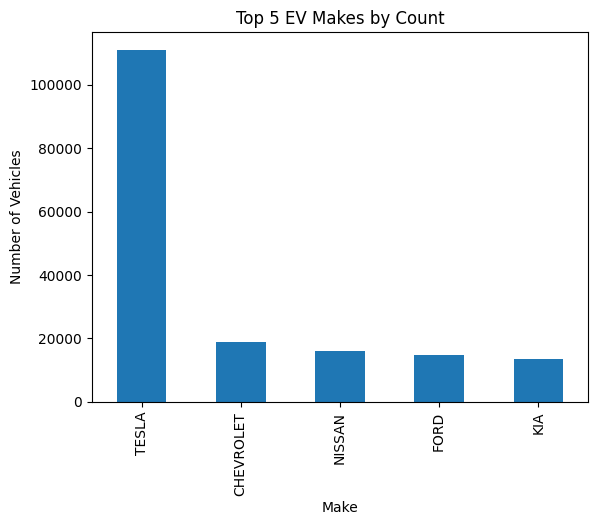

In [4]:
top5_makes = df['Make'].value_counts().head(5)

top5_makes.plot(
    kind='bar',
    title='Top 5 EV Makes by Count',
    xlabel='Make',
    ylabel='Number of Vehicles'
)

In [5]:
county_counts = df['County'].value_counts().head(15)
county_counts

County
King         133903
Snohomish     33531
Pierce        22213
Clark         16553
Thurston       9852
Kitsap         9057
Spokane        7593
Whatcom        6620
Benton         3792
Skagit         3166
Island         2962
Yakima         1864
Chelan         1691
Clallam        1647
Jefferson      1435
Name: count, dtype: int64

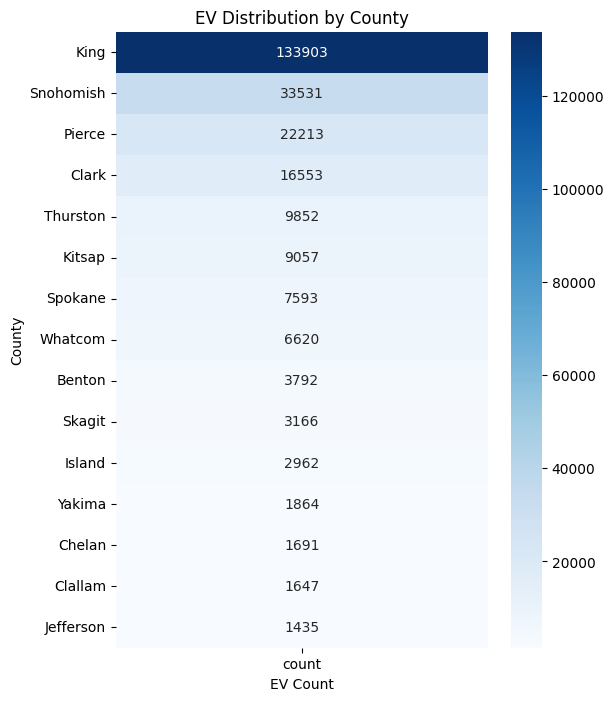

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 8))
sns.heatmap(
    county_counts.to_frame(),
    annot=True,
    fmt='d',
    cmap='Blues'
)

plt.title('EV Distribution by County')
plt.xlabel('EV Count')
plt.ylabel('County')
plt.show()

In [7]:
yearly_counts = df['Model Year'].value_counts().sort_index()
yearly_counts

Model Year
1999        2
2000        8
2002        1
2003        1
2008       20
2010       23
2011      603
2012     1402
2013     3989
2014     3223
2015     4430
2016     5139
2017     8459
2018    14007
2019    10811
2020    12099
2021    20628
2022    29622
2023    59324
2024    49138
2025    35954
2026    11379
Name: count, dtype: int64

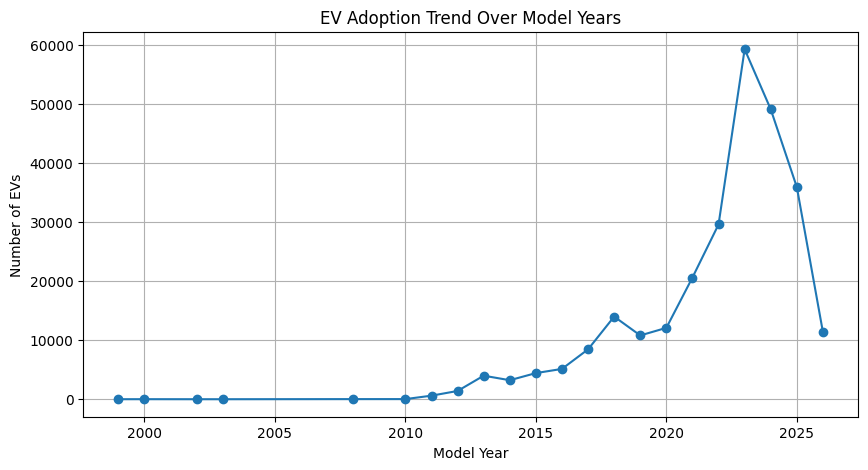

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')

plt.title('EV Adoption Trend Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.grid(True)

plt.show()


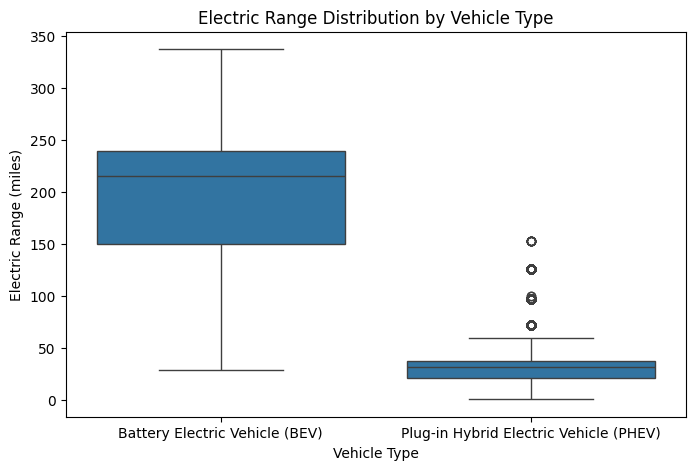

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df[df['Electric Range'] > 0],
    x='Electric Vehicle Type',
    y='Electric Range'
)

plt.title('Electric Range Distribution by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Electric Range (miles)')
plt.show()


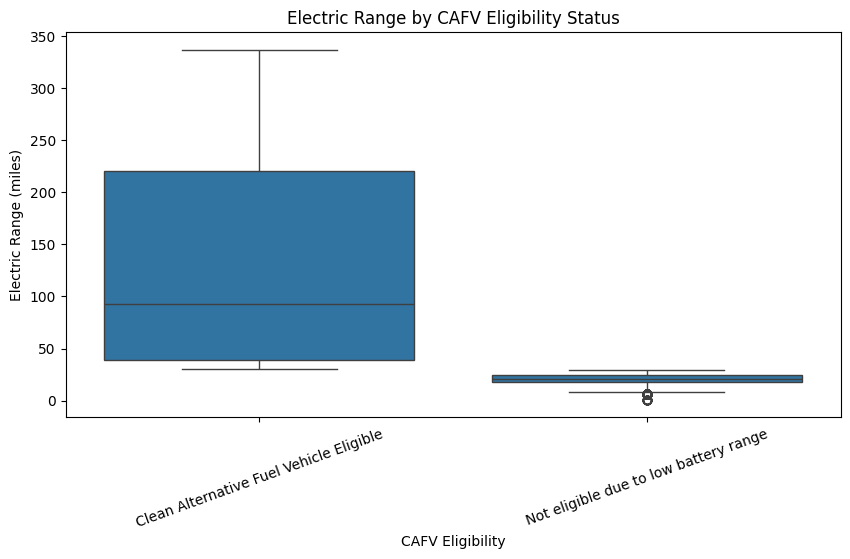

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df[df['Electric Range'] > 0],
    x='Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    y='Electric Range'
)

plt.xticks(rotation=20)
plt.title('Electric Range by CAFV Eligibility Status')
plt.xlabel('CAFV Eligibility')
plt.ylabel('Electric Range (miles)')
plt.show()


In [11]:
cafv_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
cafv_counts


Clean Alternative Fuel Vehicle (CAFV) Eligibility
Eligibility unknown as battery range has not been researched    169872
Clean Alternative Fuel Vehicle Eligible                          76360
Not eligible due to low battery range                            24030
Name: count, dtype: int64

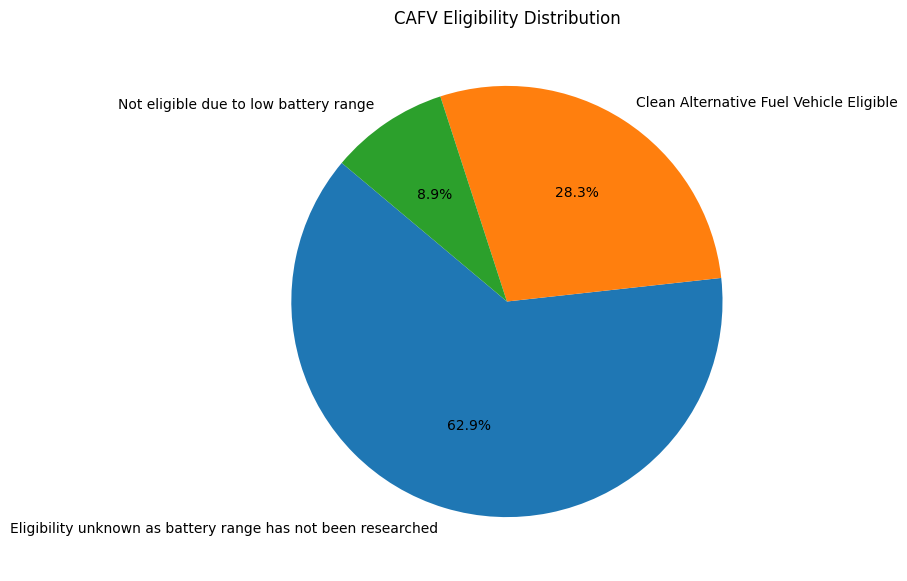

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
plt.pie(
    cafv_counts,
    labels=cafv_counts.index,
    autopct='%1.1f%%',
    startangle=140
)

plt.title('CAFV Eligibility Distribution')
plt.show()

In [14]:
# Drop missing locations
geo_df = df.dropna(subset=['Vehicle Location']).copy()

# Extract longitude and latitude
geo_df['Longitude'] = geo_df['Vehicle Location'].str.extract(r'POINT \(([-\d\.]+)')[0].astype(float)
geo_df['Latitude'] = geo_df['Vehicle Location'].str.extract(r'POINT \([-\d\.]+ ([-\d\.]+)\)')[0].astype(float)

geo_df[['Longitude', 'Latitude']].head()


,Longitude,Latitude
0,-122.89165,47.03954
1,-122.18384,47.80310
2,-122.17743,47.41185
3,-122.03439,47.53010
4,-122.35436,47.67596


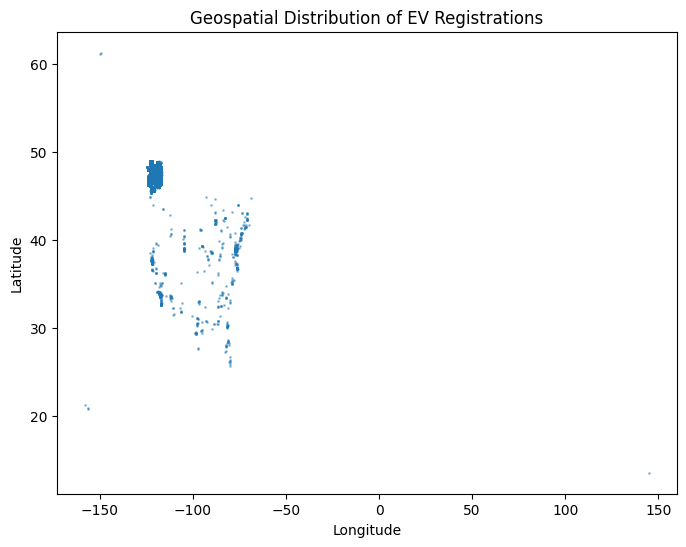

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(
    geo_df['Longitude'],
    geo_df['Latitude'],
    s=1,
    alpha=0.4
)

plt.title('Geospatial Distribution of EV Registrations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
